In [10]:
# this notebook measures how much time does it take to converge as a function of different parameters
# lets start with number of images!
%pylab inline

import numpy
import astrohack_projections
import matplotlib.pyplot as plt

# plot parameters
plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

# initial galaxy data
file_path = "./illustris_galaxies/cutout_83.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((30, 40))

shape = (30, 40)
number_of_gauss = [1, 2, 3, 4, 5]
albums = []
img_num = 32

for n, num_g in enumerate(number_of_gauss):
    # build the galaxy
    gal_model = astrohack_projections.galaxy_model_3d()
    for g in xrange(num_g):
        v = numpy.random.uniform(-3, 3, size=3)
        mu = numpy.random.uniform(-3, 3, size=3)
        gal_model.add_gaussian(1.0, mu, basevar + numpy.outer(v,v))
        
    # album and PSF initialisation
    album = astrohack_projections.album_and_model()
    psf = astrohack_projections.mixture_of_gaussians(2)
    psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)
    illustris_gal.set_image_shape(shape)
    
    for i in xrange(img_num):
        # projection parameters
        xi_hat, eta_hat = astrohack_projections.choose_random_projection()
        alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, 3)
        intensity = 150
        scale = 0.18 * numpy.exp(numpy.random.uniform())
        xshift = numpy.random.uniform(shape[0]/2 - 1, shape[0]/2 + 1)
        yshift = numpy.random.uniform(shape[1]/2 - 1, shape[1]/2 + 1)
        psf_size = 1
        bg = 0.
        # illustris galaxy
        kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
        illustris_gal.set_image_parameters(**kwargs)
        illustris_gal.construct_image(xi_hat, eta_hat)
        # image
        image = astrohack_projections.image_and_model()
        image.set_shape(shape)
        image.set_psf(psf)
        kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0}
        image.set_parameters(**kwargs)
        image.set_galaxy(gal_model)
        image.set_ivar(numpy.ones(image.get_shape()))
        image.set_data(illustris_gal.get_image() + numpy.random.normal(size=image.get_shape())/ numpy.sqrt(image.ivar))
        # album
        album.add_image(image)
        print "num of galpars:", len(image.galaxy.get_parameters_vector())

    albums.append(album)
print len(albums)
print "new"

Populating the interactive namespace from numpy and matplotlib
 num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 10
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num of galpars: 20
num o

`%matplotlib` prevents importing * from pylab and numpy


/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


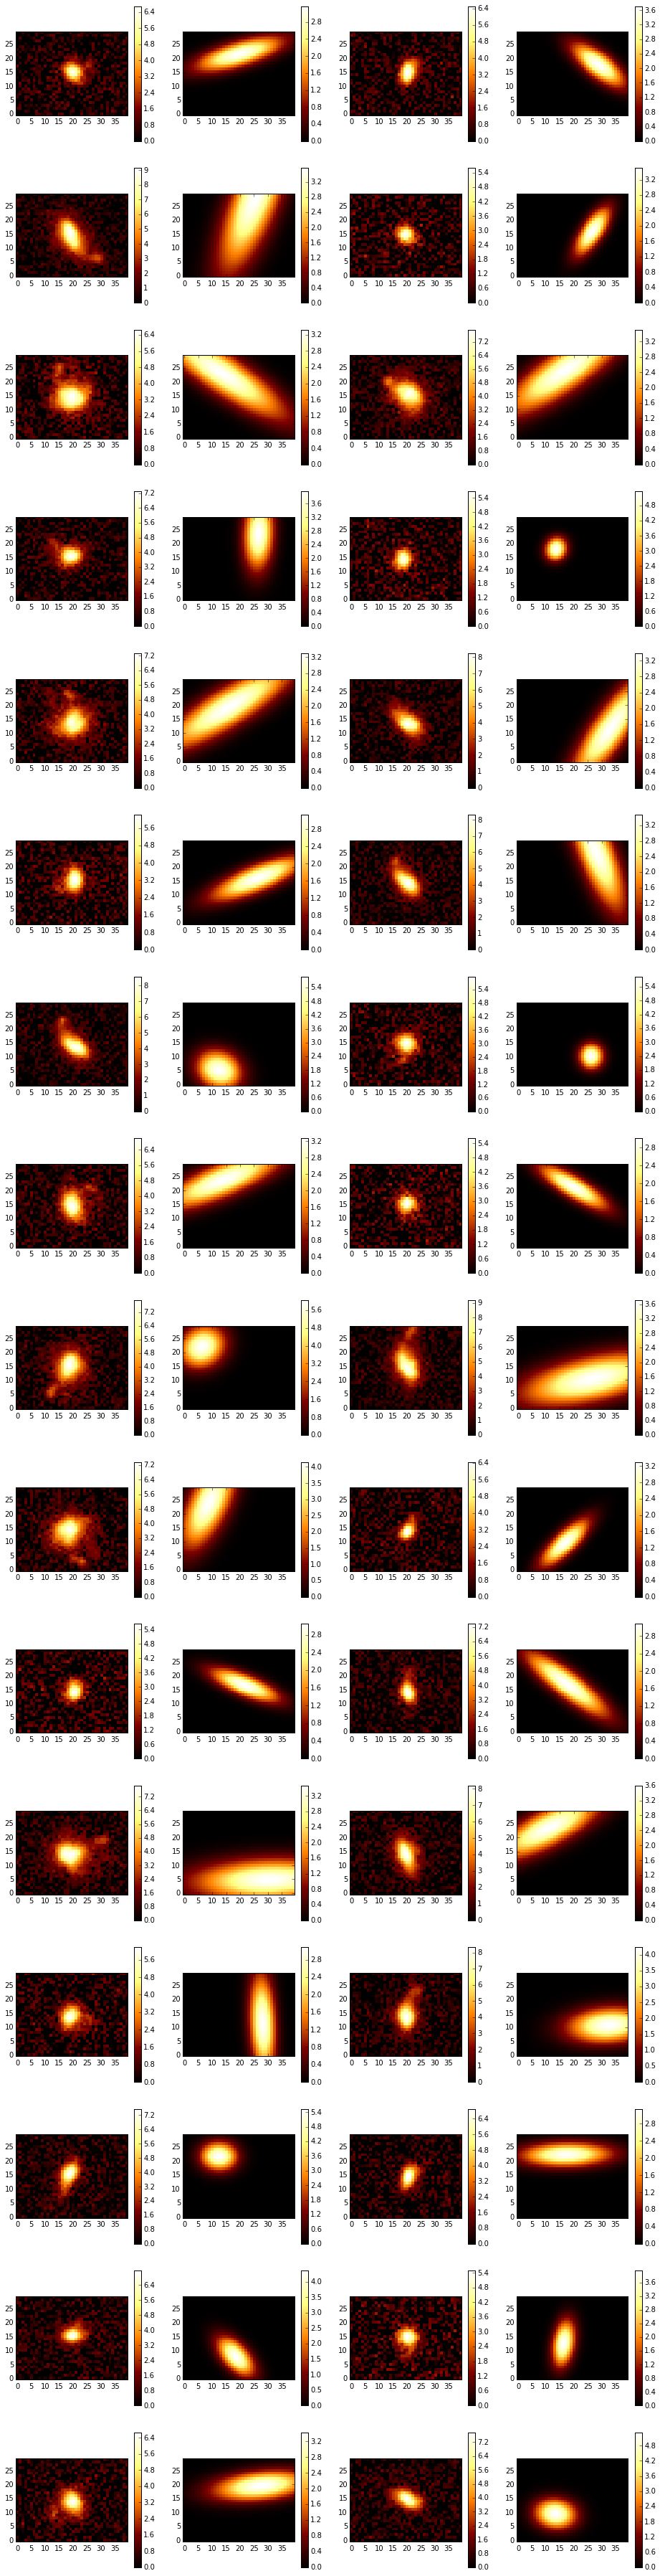

In [11]:
def showme(album):
    plt.rcParams['figure.figsize'] = 16, len(album)*2
    plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}
    for i in xrange(len(album)):
        image = album.get_all_images()[i]
        plt.subplot(len(album)/2, 4, 2*i+1)
        vmin = -5. / numpy.sqrt(numpy.median(image.get_ivar())) # assumes bg = 0
        vmax = -2. * vmin # assumes bg = 0
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_data())), **plot_kwargs)
        plt.colorbar()
        plt.subplot(len(album)/2, 4, 2*i+2)
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_synthetic())), **plot_kwargs)
        plt.colorbar()
        
showme(albums[0])

In [4]:
# INITIALIZATION BLOCK!
import scipy.optimize as op

galpar0 = numpy.array([1., 2., 0., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 2., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 0., 2., 1., 1., 1., 0., 0., 0.])
imgpar0 = (10., 30., 30., 0.1, 0.5, 14., 20., 0.)

for album in albums:
    print "album before", album(galpar0)
    for image in album:
        print "image before", image(imgpar0)

    #showme(album)
    #plt.savefig("./fitting_pngs/time_simulations/initialisation_album_%s.pdf" % (len(album)))
    #plt.close()

album before 1388460.68983
image before 36866.5532205
image before 141257.239166
image before 13447.6383592
image before 24164.0592438
image before 22600.1332871
image before 58588.2977737
image before 43452.1738571
image before 24218.8401532
image before 58597.0158202
image before 39890.6963662
image before 26073.1782777
image before 26599.4861122
image before 109248.648081
image before 137198.439617
image before 35205.3612257
image before 47032.9433719
image before 18361.1898649
image before 128895.773348
image before 11255.5449018
image before 46402.2985075
image before 28112.6586221
image before 11424.0570379
image before 141446.531874
image before 12291.3700014
image before 45709.8214807
image before 105249.806121
image before 129123.762664
image before 122590.757641
image before 125184.503836
image before 12600.696112
image before 42425.7114432
image before 31601.0906018
album before 2705194.05465
image before 106284.831925
image before 14619.2802252
image before 13021.3883548
im

In [12]:
import time
# for every album, run two galpar and two imagepar minimisations

times_dict = {1:[], 2:[], 3:[], 4:[], 5:[]}

shape = (30, 40)
number_of_gauss = [1, 2, 3, 4, 5]

for n, num_g in enumerate(number_of_gauss):
    print img_num
    
    album = albums[n]
    num_runs = 4
    
    for i in xrange(num_runs):
        # album optimisation
        time_start = time.time()      
        galpar0 = album.get_all_images()[0].galaxy.get_parameters_vector()
        print "album before", album(galpar0), len(galpar0)
        result = op.minimize(album, galpar0, method="Powell")
        galpar = result['x']
        print "album after", album(galpar)
        time_end = time.time()
        
        times_dict[num_g].append(time_end - time_start)
        showme(album)
        plt.savefig("./fitting_pngs/time_simulations3/album_%s_run_%s.pdf" % (num_g, str(2* i).zfill(2)))
        plt.close()

        # image optimisation
        time_start = time.time()
        for image in album:
            imgpar0 = image.get_parameters_vector()
            print "image before", image(imgpar0)
            result = op.minimize(image, imgpar0)
            imgpar = result['x']
            print "image after", image(imgpar)
        time_end = time.time()
        times_dict[num_g].append(time_end - time_start)

        showme(album)
        plt.savefig("./fitting_pngs/time_simulations3/album_%s_run_%s.pdf" % (num_g, str(2*i+1).zfill(2) ))
        plt.close()

32
album before 1718534.93666 10
album after 211784.379848
image before 3351.17393897
image after 1379.95420762
image before 3926.75244169
image after 1541.54681851
image before 21272.3240826
image after 10650.5443954
image before 2334.28557573
image after 1302.01932371
image before 8438.81539852
image after 2365.87330007
image before 6320.94166461
image after 3639.04166868
image before 3014.33946205
image after 1733.74396164
image before 2333.43073659
image after 1285.40431856
image before 6227.23888598
image after 2995.53436902
image before 10038.3401479
image after 3215.34862469
image before 2503.81216778
image after 1455.27741701
image before 10228.1124197
image after 5030.14091177
image before 14334.8246107
image after 6309.34013876
image before 2658.68115708
image after 1451.70419986
image before 7038.51884289
image after 2049.9064834
image before 2383.66515522
image after 1310.89059197
image before 6867.60327609
image after 3316.90080418
image before 22007.1282727
image after 91

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


 1633.81375938
album before 101043.93799 20
album after 74191.3714891
image before 2247.64819094
image after 2177.75739928
image before 2240.04078572
image after 2154.883646
image before 1642.67221561
image after 1608.40912663
image before 1335.89594364
image after 1306.02179333
image before 1234.02822646
image after 1217.87468784
image before 3188.33410044
image after 2713.25217191
image before 1617.0282461
image after 1530.39123454
image before 3781.39109894
image after 3464.38313413
image before 2868.52939783
image after 2530.96649432
image before 1368.16062094
image after 1347.89510423
image before 2612.82416109
image after 2583.03592293
image before 1257.45081223
image after 1248.19745533
image before 1898.14207463
image after 1864.63322668
image before 3046.78183353
image after 2849.3574929
image before 1588.56986524
image after 1577.80416514
image before 1512.03639896
image after 1487.50626539
image before 2906.90120569
image after 2165.50380852
image before 3215.61890549
image 

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:2108: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


In [13]:
print times_dict

{1: [50.69012093544006, 21.3942768573761, 13.968705177307129, 17.20725703239441, 14.51300597190857, 12.829061031341553, 10.308454036712646, 13.29848599433899], 2: [327.0866770744324, 31.141858100891113, 83.83874607086182, 25.850762128829956, 74.26261496543884, 21.04110097885132, 77.10531783103943, 20.890804052352905], 3: [601.7877261638641, 40.61768102645874, 265.4567720890045, 30.979303121566772, 151.391371011734, 29.630604028701782, 75.49631690979004, 26.64721393585205], 4: [2295.280686855316, 51.64630484580994, 1151.7531900405884, 40.87672805786133, 198.54106092453003, 34.75434494018555, 194.39383101463318, 34.34956097602844], 5: [3172.4312369823456, 65.26921200752258, 847.8415880203247, 43.02193903923035, 466.4366099834442, 40.69065594673157, 649.7673718929291, 40.427730083465576]}
